<a href="https://colab.research.google.com/github/ethantlogan/FWE_458/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#This code imports the data from my drive into a pandas dataframe and uploads it
from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/FWE458/'
filename = filedir + "SW_with_AOD.csv"

import pandas as pd
df = pd.read_csv(filename)
df

Mounted at /content/drive


SZA       AOD       COD  CLD_FRAC        UW         TO3  \
0      24.936783  1.172892  2.440000  0.286546  2.021502  311.419861   
1      34.865055  1.626954  4.630000  0.468832  4.859887  308.713379   
2      27.330978  1.095007  2.030000  0.301414  5.278558  293.322052   
3      20.361732  1.126541  5.500000  0.377019  4.856422  321.498199   
4      13.433228  0.725452  0.736076  0.075378  0.644262  295.448975   
...          ...       ...       ...       ...       ...         ...   
35219  37.315063  0.181112  2.360000  0.071185  2.312875  268.948242   
35220  64.573303  0.258045  0.392416  0.060352  0.893602  328.640442   
35221  61.829556  0.138252  0.233040  0.033619  2.335012  259.676788   
35222  67.391891  0.698632  1.368286  0.218022  0.462143  265.180176   
35223  34.609253  1.480052  3.470983  0.423863  2.025284  313.016113   

         Pressure    BSA    WSA   SW_direct  SW_diffuse  
0      959.085083  0.162  0.193  467.191650  300.820007  
1      968.427551  0.155  0.169  264.900024  385.293335  
2      988.040588  0.136  0.149  313.553314  321.538361  
3      977.610229  0.156  0.179  143.902298  501.073639  
4      882.321411  0.188  0.212  957.331665   79.003334  
...           ...    ...    ...         ...         ...  
35219  970.049805  0.146  0.171  474.672302  207.633331  
35220  988.746948  0.135  0.132  382.056671   74.483337  
35221  970.049805  0.146  0.171  115.962257  281.266663  
35222  811.828369  0.192  0.183  385.561645   50.876663  
35223  954.383789  0.194  0.224  631.874390  141.549988  

[35224 rows x 11 columns]

In [3]:
#Check for missing values
print(df.isnull().sum())

#Basic statistics
print(df.describe())

SZA           0
AOD           0
COD           0
CLD_FRAC      0
UW            0
TO3           0
Pressure      0
BSA           0
WSA           0
SW_direct     0
SW_diffuse    0
dtype: int64
                SZA           AOD           COD      CLD_FRAC            UW  \
count  35224.000000  35224.000000  35224.000000  35224.000000  35224.000000   
mean      43.955300      0.607132      1.386743      0.146884      2.272496   
std       15.444956      0.561003      1.427229      0.136276      1.315785   
min        0.325058      0.001963      0.000031      0.000000      0.093588   
25%       32.476989      0.204275      0.290974      0.037539      1.172140   
50%       45.385958      0.399925      0.809864      0.095963      2.011255   
75%       56.807423      0.830358      2.163631      0.229764      3.218210   
max       69.999329      5.267975     16.270000      0.645196      6.701678   

                TO3      Pressure           BSA           WSA     SW_direct  \
count  35224.000000 

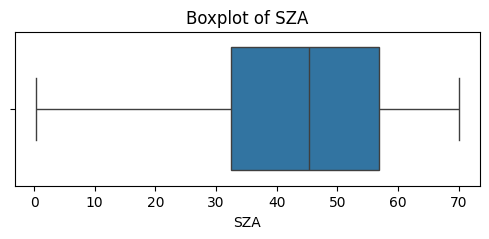

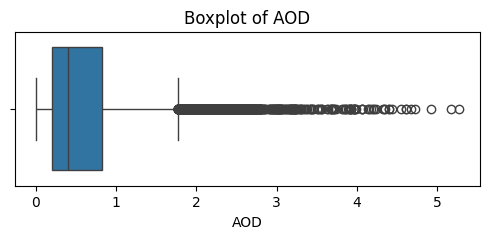

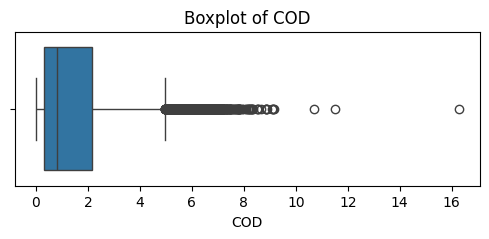

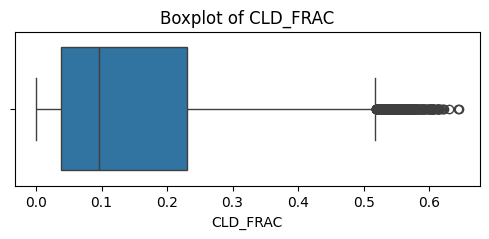

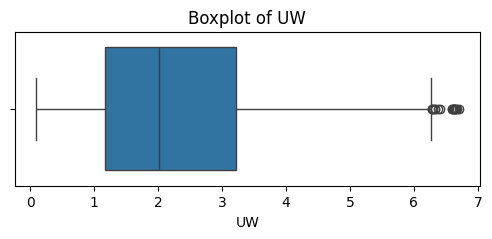

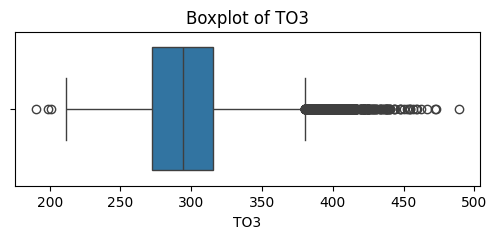

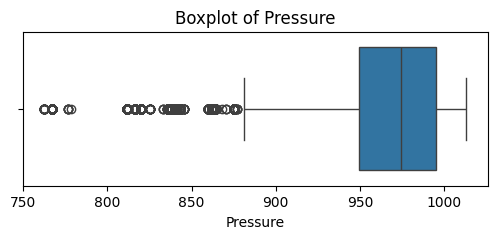

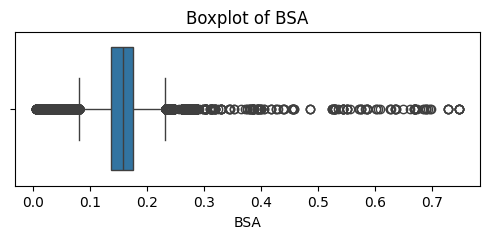

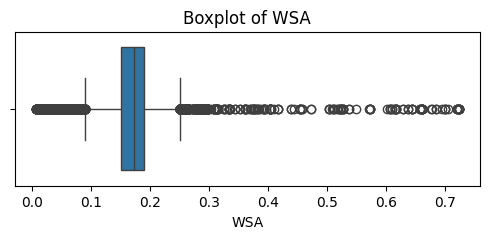

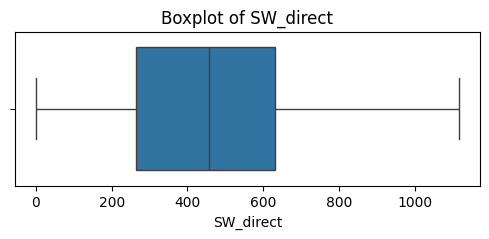

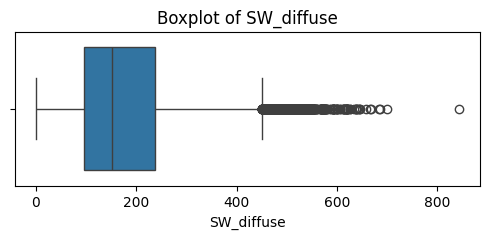

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot boxplots for each feature in order to see if there is outliers
features = ['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA',
            'SW_direct', 'SW_diffuse']

#Create a for loop to graph all graphs easier
for feature in features:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


In [5]:
#Select numerical features I wanted to check for outliers
features_to_check = ['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3',
                     'Pressure', 'BSA', 'WSA', 'SW_direct', 'SW_diffuse']

#I researched a way to remove outliers from a dataset and it uses IQR and
#quartiles to determine outliers
# Calculate Q1 and Q3
Q1 = df[features_to_check].quantile(0.25)
Q3 = df[features_to_check].quantile(0.75)
IQR = Q3 - Q1

# Then create a boolean mask for rows without outliers which creates an array
#of true/false values in order to create a filter for outliers
no_outliers = ~((df[features_to_check] < (Q1 - 1.5 * IQR)) |
                (df[features_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)

#Next apply the filter to get rid of the outliers determined
df_clean = df[no_outliers].reset_index(drop=True)

#Check new shape
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_clean.shape}")


Original dataset shape: (35224, 11)
Dataset shape after removing outliers: (24956, 11)


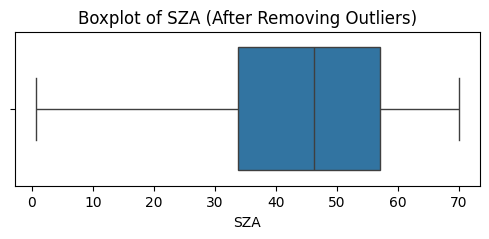

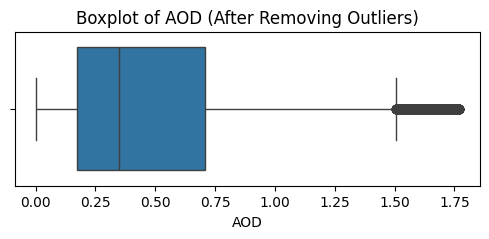

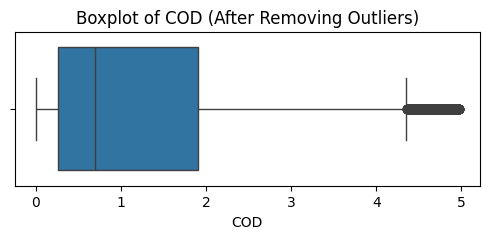

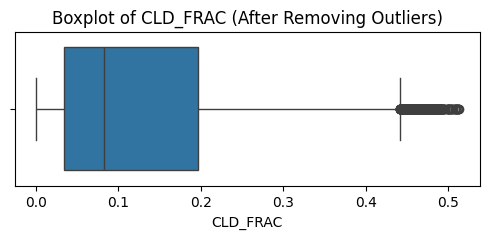

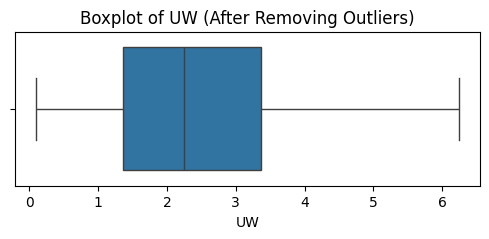

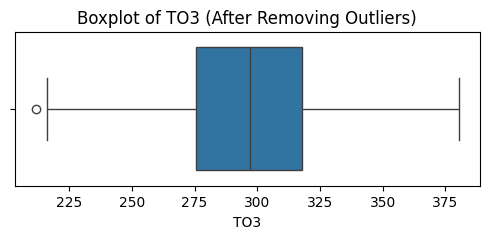

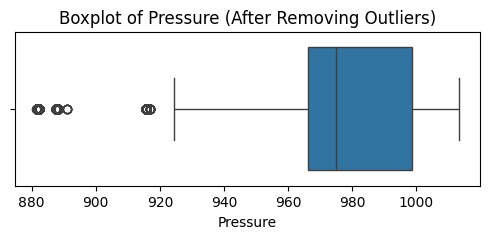

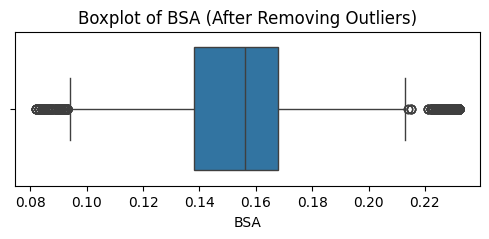

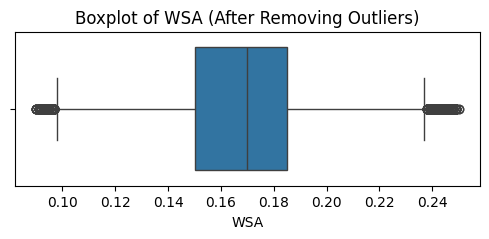

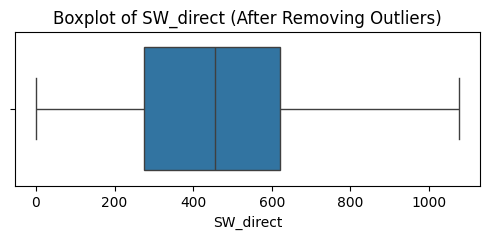

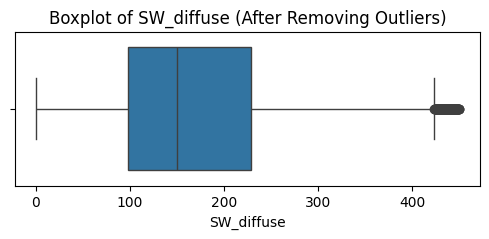

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create new boxplots after the outliers have been removed
for feature in features_to_check:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df_clean[feature])
    plt.title(f"Boxplot of {feature} (After Removing Outliers)")
    plt.show()


In [7]:
#Create SW_total
df["SW_total"] = df["SW_direct"] + df["SW_diffuse"]

#Create a categorical column for quartiles
df["SW_total_category"] = pd.qcut(df["SW_total"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

df


SZA       AOD       COD  CLD_FRAC        UW         TO3  \
0      24.936783  1.172892  2.440000  0.286546  2.021502  311.419861   
1      34.865055  1.626954  4.630000  0.468832  4.859887  308.713379   
2      27.330978  1.095007  2.030000  0.301414  5.278558  293.322052   
3      20.361732  1.126541  5.500000  0.377019  4.856422  321.498199   
4      13.433228  0.725452  0.736076  0.075378  0.644262  295.448975   
...          ...       ...       ...       ...       ...         ...   
35219  37.315063  0.181112  2.360000  0.071185  2.312875  268.948242   
35220  64.573303  0.258045  0.392416  0.060352  0.893602  328.640442   
35221  61.829556  0.138252  0.233040  0.033619  2.335012  259.676788   
35222  67.391891  0.698632  1.368286  0.218022  0.462143  265.180176   
35223  34.609253  1.480052  3.470983  0.423863  2.025284  313.016113   

         Pressure    BSA    WSA   SW_direct  SW_diffuse     SW_total  \
0      959.085083  0.162  0.193  467.191650  300.820007   768.011658   
1      968.427551  0.155  0.169  264.900024  385.293335   650.193359   
2      988.040588  0.136  0.149  313.553314  321.538361   635.091675   
3      977.610229  0.156  0.179  143.902298  501.073639   644.975937   
4      882.321411  0.188  0.212  957.331665   79.003334  1036.334999   
...           ...    ...    ...         ...         ...          ...   
35219  970.049805  0.146  0.171  474.672302  207.633331   682.305633   
35220  988.746948  0.135  0.132  382.056671   74.483337   456.540008   
35221  970.049805  0.146  0.171  115.962257  281.266663   397.228920   
35222  811.828369  0.192  0.183  385.561645   50.876663   436.438309   
35223  954.383789  0.194  0.224  631.874390  141.549988   773.424377   

      SW_total_category  
0                    Q3  
1                    Q3  
2                    Q2  
3                    Q3  
4                    Q4  
...                 ...  
35219                Q3  
35220                Q1  
35221                Q1  
35222                Q1  
35223                Q3  

[35224 rows x 13 columns]

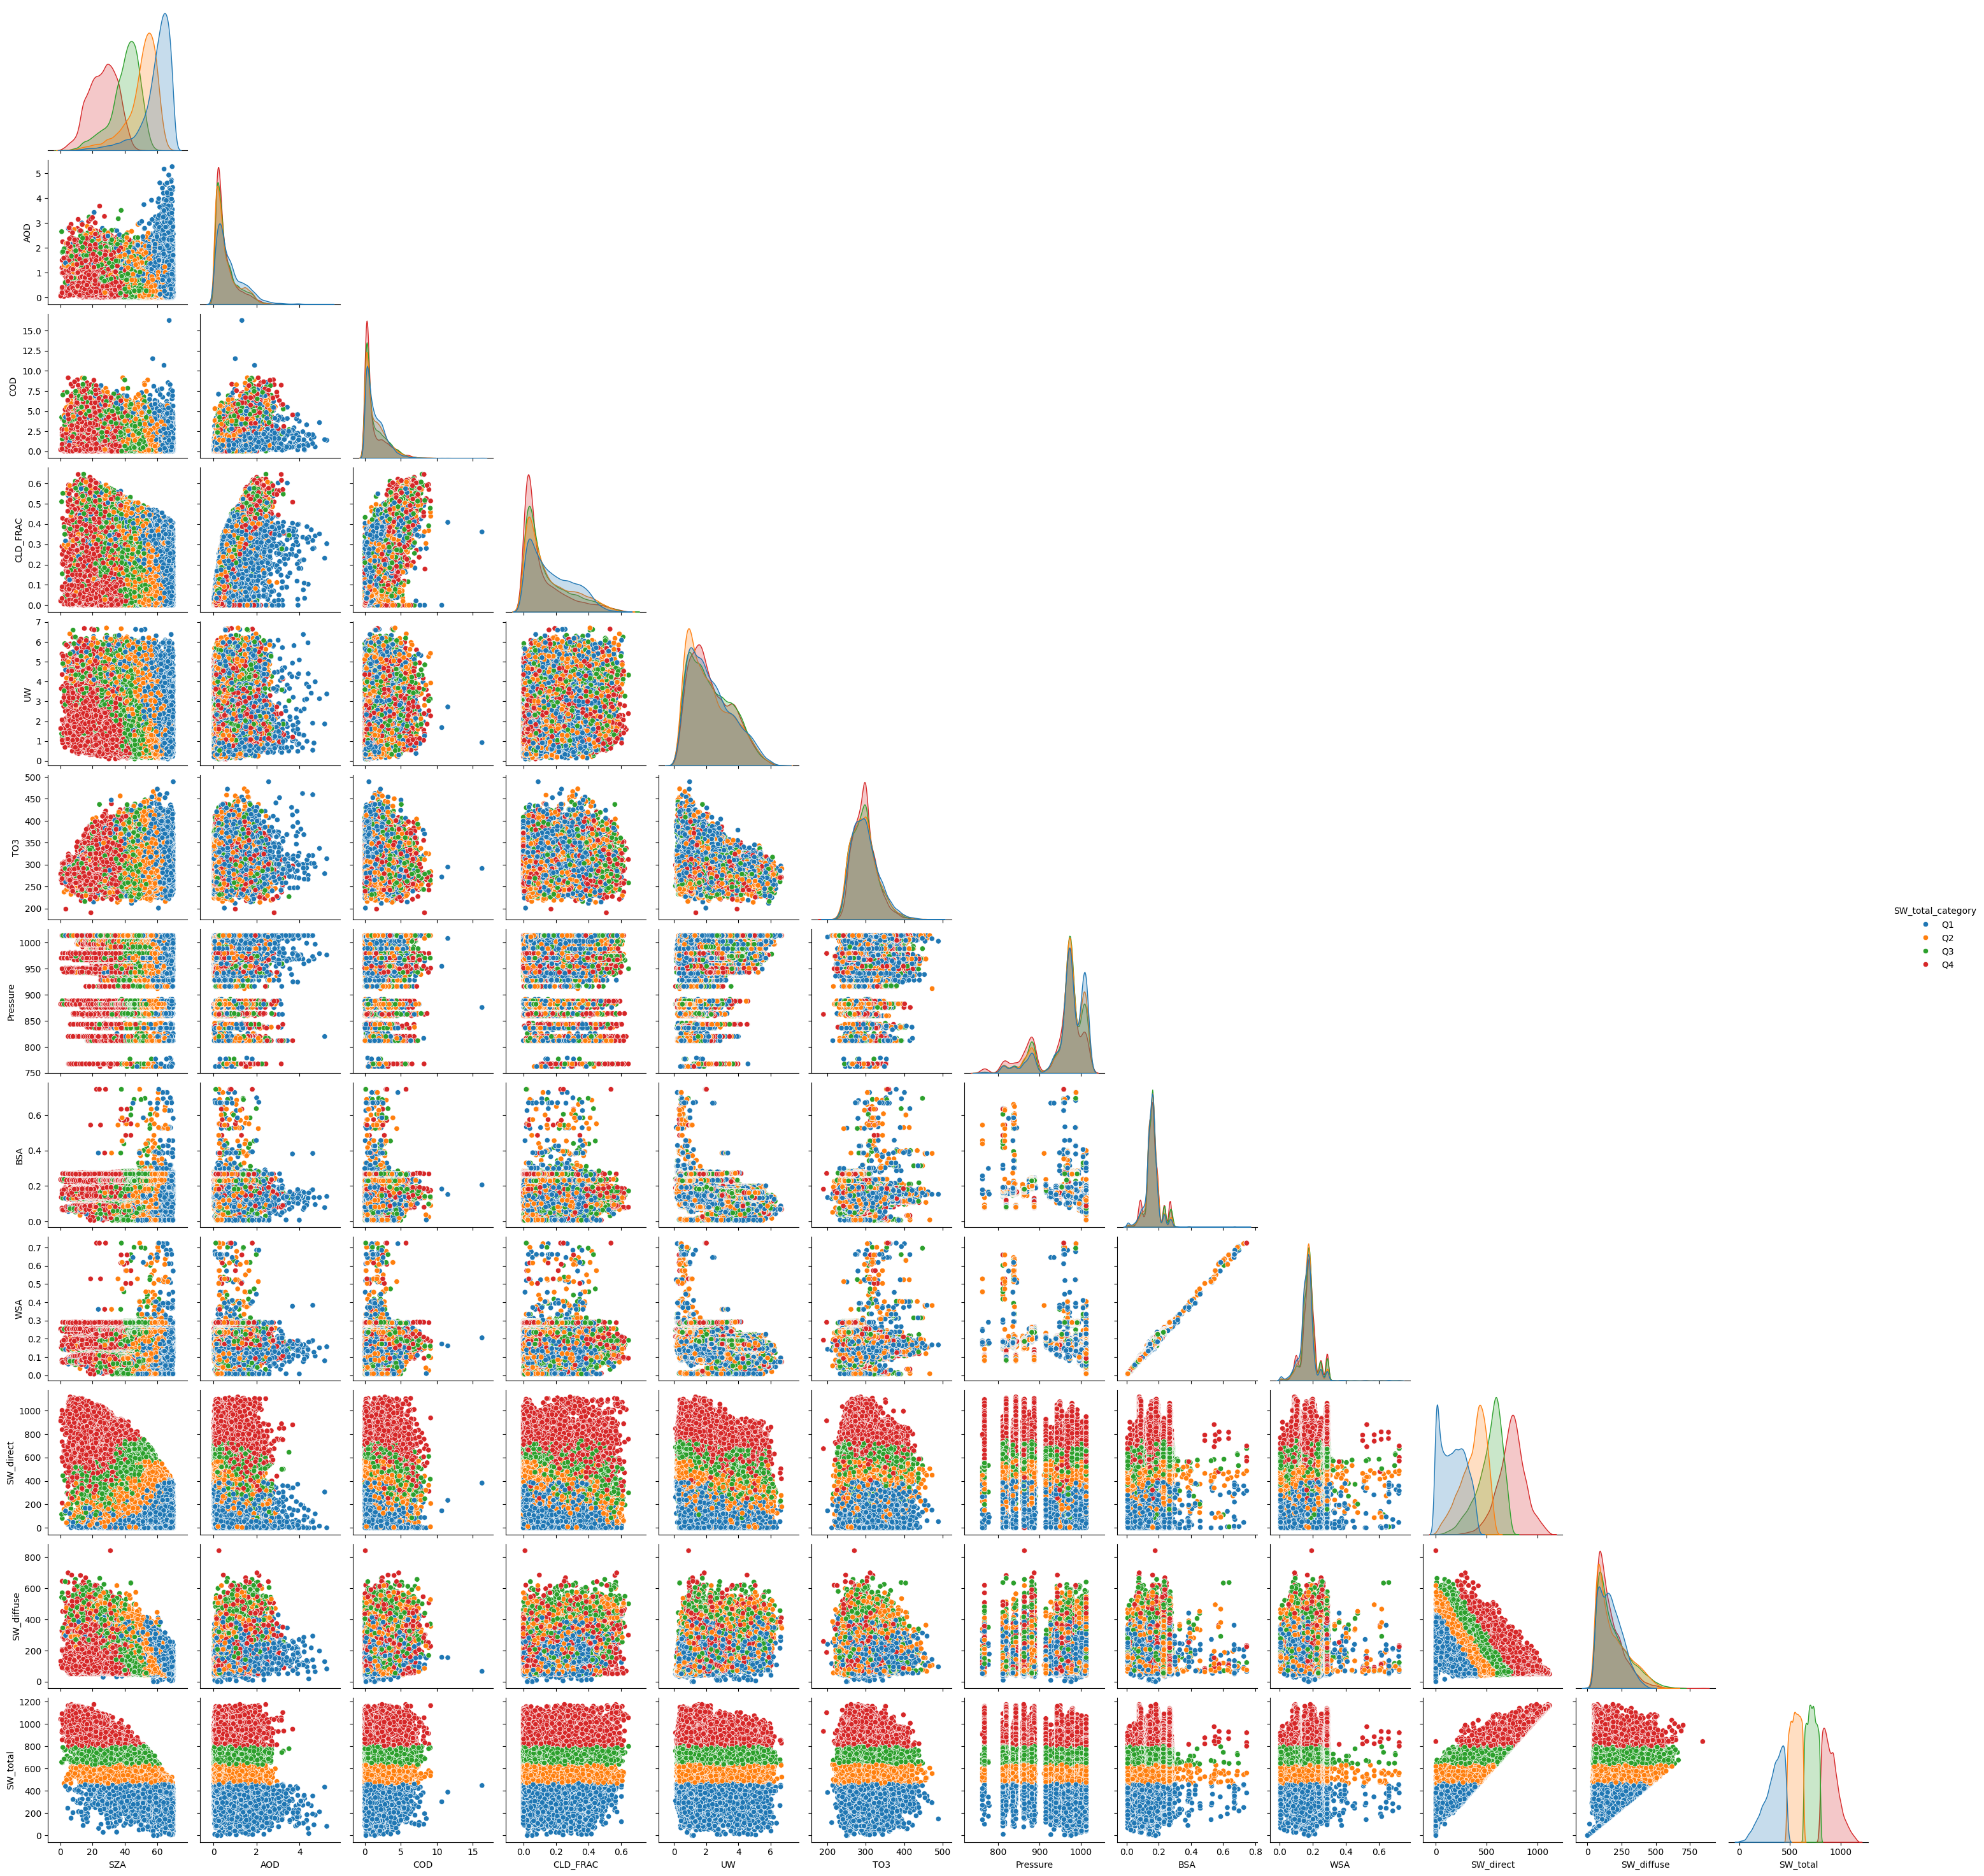

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#I create a subset of columns to plot
columns_to_plot = ['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA',
                   'SW_direct', 'SW_diffuse', 'SW_total', 'SW_total_category']

#Then I use Seaborns pairplot to graph all variables against all variables
sns.pairplot(df[columns_to_plot], hue='SW_total_category', diag_kind='kde', corner=True)
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

#Select all of the input features except SW variables
features = ['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA']
X = df[features]

#I researched ways to make variable data normal and found StandardScaler
#It works by subtracting the actual value from a column from the mean of that
#column and dividing it by the SD. You want to standardize and normalize so
#that no one part of the data set weighs more heavily and they are easier
#to compare
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


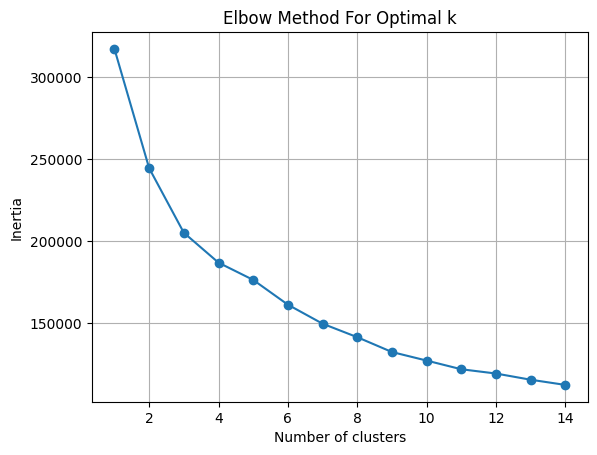

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#I looked up ways to find an optimal number of clusters and one method that came
#up was using inertia so that's the way I went with. It works by summing the
#squared distance of each data point to its closest cluster center
#Then use the inertia to find where the rate of decrease stops happening
#rapidly and that's the elbow point.
inertia = []
k_range = range(1, 15)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


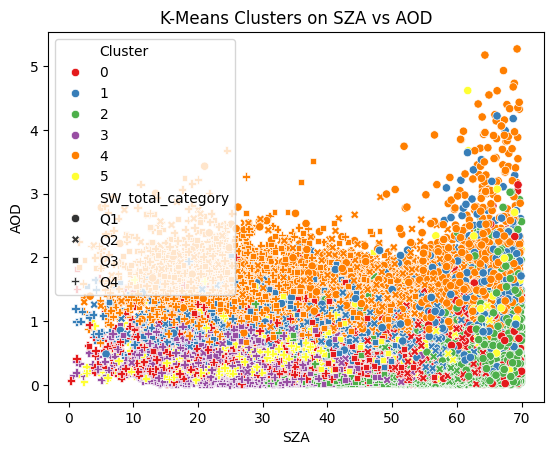

In [14]:
#Fit KMeans with k=6, as that seems to me where the dropoff occurs
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

import seaborn as sns

sns.scatterplot(data=df, x='SZA', y='AOD', hue='Cluster', palette='Set1', style='SW_total_category')
plt.title('K-Means Clusters on SZA vs AOD')
plt.show()


The clusters seem to be skewed left, as there are many values on the right side of the graph. Cluster 4 seems to be the highest in AOD, then cluster 1, then the other clusters start to overlap a lot and there's not really a clear distinction. Cluster 2 seems to be heavily in the bottom right though. For the SW_total, it seems to go in a gradient from Q4->Q1 left to right. The clusters do not appear to be that meaningful in terms of solar radiation categories as they are not super clearly distinct and often have a lot of overlap. The one prominent cluster is 4, and that seems to provide some information and detail on the data.

In [16]:
from sklearn.model_selection import train_test_split

#Input features (excluding the target variable)
X = df_clean[['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA']]

#Create SW_total for the cleaned data so I can use the target variable in the new dataframe
df_clean["SW_total"] = df_clean["SW_direct"] + df_clean["SW_diffuse"]

#Define the target variable
y = df_clean['SW_total']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Use this model to train a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

#Predict on the test set
y_pred_dt = dt_model.predict(X_test)

#Calculate RMSE and R²
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - RMSE: {rmse_dt}")
print(f"Decision Tree Regressor - R²: {r2_dt}")


Decision Tree Regressor - RMSE: 131.4863663167112
Decision Tree Regressor - R²: 0.6124715717192079


In [18]:
from sklearn.ensemble import RandomForestRegressor

#Train a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

#Predict on test set
y_pred_rf = rf_model.predict(X_test)

#Calculate RMSE and R²
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - RMSE: {rmse_rf}")
print(f"Random Forest Regressor - R²: {r2_rf}")


Random Forest Regressor - RMSE: 92.82733260001282
Random Forest Regressor - R²: 0.8068503782419862


<ipython-input-30-0724a700377b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importances, palette='viridis')


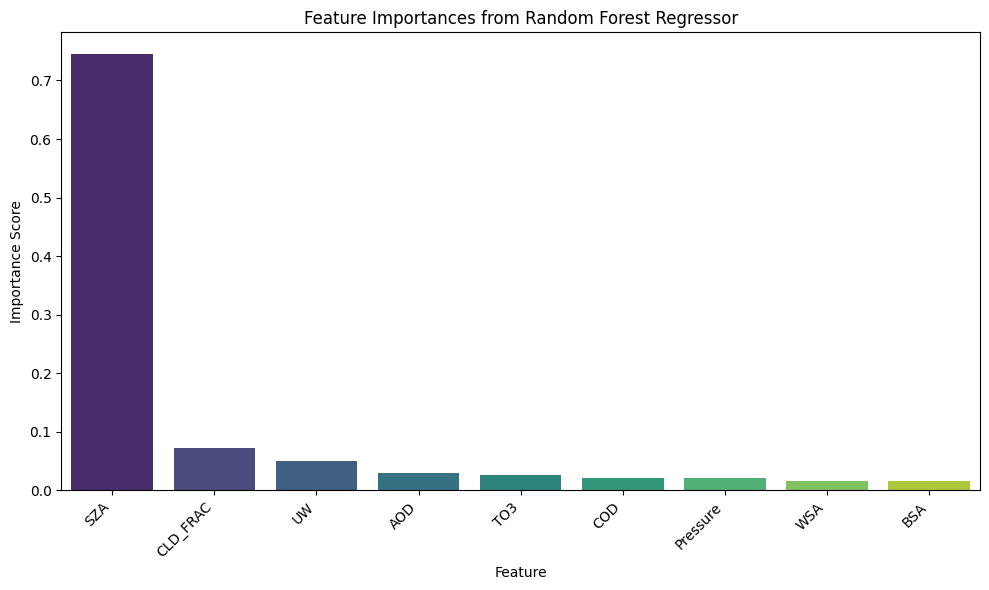

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by importance (descending for vertical bars)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#Plot the figures by feature and importance score
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importances, palette='viridis')

plt.title('Feature Importances from Random Forest Regressor')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


The SZA (solar zenith angle) heavily outweighs all the other variables for feature importance. If you look at the comparison graphs of all the variables
(ignoring SW variables) SZA does the best job at categorizing all the data into the four quartiles. So the random forest could use that good categorization skill heavily into its training model and that is why it's the most important feature.

In [23]:
#The features (excluding the target variable)
X_class = df_clean[['SZA', 'AOD', 'COD', 'CLD_FRAC', 'UW', 'TO3', 'Pressure', 'BSA', 'WSA']]

#Create SW_total for the cleaned data to allow the target variable to be in the new dataframe
df_clean["SW_total"] = df_clean["SW_direct"] + df_clean["SW_diffuse"]

#Create a categorical column for quartiles for the cleaned data
df_clean["SW_total_category"] = pd.qcut(df_clean["SW_total"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])


#Define the target variable
y_class = df_clean['SW_total_category']

#Split into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

#Train the KNeighborsClassifier model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_class, y_train_class)

#Predict on test set from the trained model
y_pred_knn = knn_model.predict(X_test_class)

#Evaluate the model based on the accuracy, precision, recall, and confusion matrix scores
accuracy_knn = accuracy_score(y_test_class, y_pred_knn)
precision_knn, recall_knn, fscore_knn, _ = precision_recall_fscore_support(y_test_class, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test_class, y_pred_knn)

print(f"KNeighbors Classifier - Accuracy: {accuracy_knn}")
print(f"KNeighbors Classifier - Precision: {precision_knn}")
print(f"KNeighbors Classifier - Recall: {recall_knn}")
print(f"KNeighbors Classifier - F-Score: {fscore_knn}")
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)


KNeighbors Classifier - Accuracy: 0.6652644230769231
KNeighbors Classifier - Precision: 0.6655386352802378
KNeighbors Classifier - Recall: 0.6652644230769231
KNeighbors Classifier - F-Score: 0.6652489498128504
Confusion Matrix (KNN):
[[880 283  66  25]
 [269 712 220  56]
 [ 41 263 743 203]
 [ 12  28 205 986]]


In [26]:
from sklearn.naive_bayes import GaussianNB

#Train the GaussianNB model
gnb_model = GaussianNB()
gnb_model.fit(X_train_class, y_train_class)

#Predict on test set from the trained model
y_pred_gnb = gnb_model.predict(X_test_class)

#Evaluate the model based on the accuracy, precision, recall, and confusion matrix scores
accuracy_gnb = accuracy_score(y_test_class, y_pred_gnb)
precision_gnb, recall_gnb, fscore_gnb, _ = precision_recall_fscore_support(y_test_class, y_pred_gnb, average='weighted')
conf_matrix_gnb = confusion_matrix(y_test_class, y_pred_gnb)

print(f"GaussianNB Classifier - Accuracy: {accuracy_gnb}")
print(f"GaussianNB Classifier - Precision: {precision_gnb}")
print(f"GaussianNB Classifier - Recall: {recall_gnb}")
print(f"GaussianNB Classifier - F-Score: {fscore_gnb}")
print("Confusion Matrix (GaussianNB):")
print(conf_matrix_gnb)


GaussianNB Classifier - Accuracy: 0.6684695512820513
GaussianNB Classifier - Precision: 0.6691561068736545
GaussianNB Classifier - Recall: 0.6684695512820513
GaussianNB Classifier - F-Score: 0.6686960640208179
Confusion Matrix (GaussianNB):
[[944 219  68  23]
 [307 694 224  32]
 [ 37 321 727 165]
 [  3   0 256 972]]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

#Use only two features for visualization (using SZA as one since it's the most important)
features_2d = ['SZA', 'AOD']
X_vis = df_clean[features_2d].values

#Encode class labels
le = LabelEncoder()
y_vis = le.fit_transform(df_clean['SW_total_category'])

#Train both models on the 2D subset
knn_vis = KNeighborsClassifier(n_neighbors=5)
gnb_vis = GaussianNB()

knn_vis.fit(X_vis, y_vis)
gnb_vis.fit(X_vis, y_vis)

#Create meshgrid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]


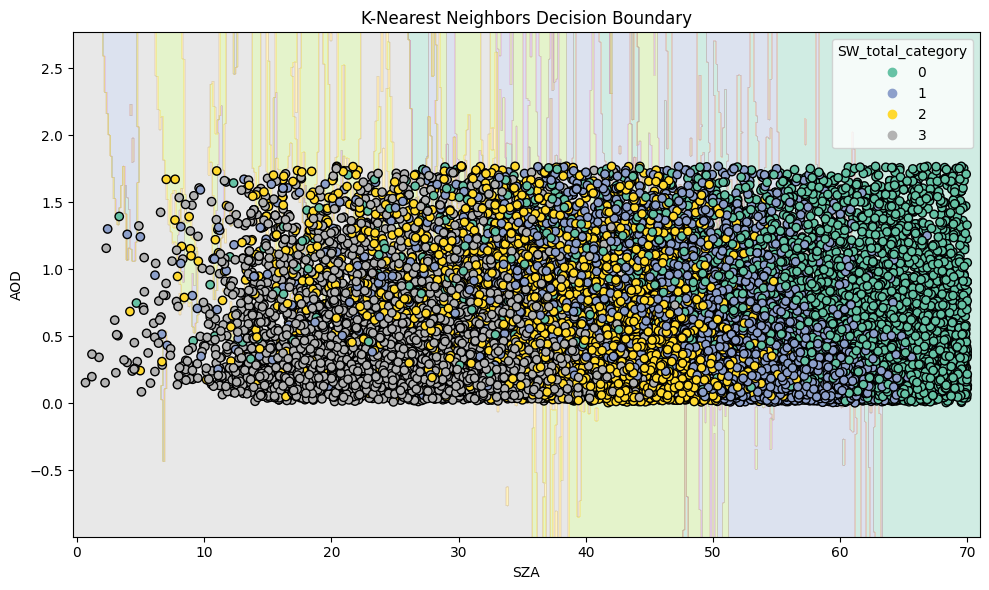

In [28]:
Z_knn = knn_vis.predict(grid).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_knn, alpha=0.3, cmap='Set2')
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='Set2', edgecolor='k')
plt.title('K-Nearest Neighbors Decision Boundary')
plt.xlabel('SZA')
plt.ylabel('AOD')
plt.legend(*scatter.legend_elements(), title="SW_total_category")
plt.tight_layout()
plt.show()


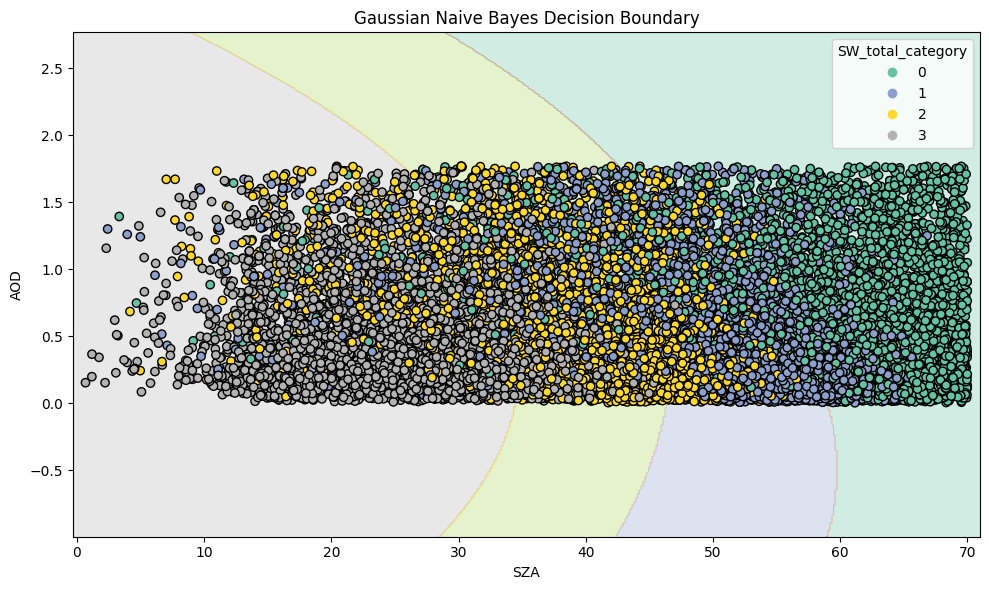

In [29]:
Z_gnb = gnb_vis.predict(grid).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_gnb, alpha=0.3, cmap='Set2')
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='Set2', edgecolor='k')
plt.title('Gaussian Naive Bayes Decision Boundary')
plt.xlabel('SZA')
plt.ylabel('AOD')
plt.legend(*scatter.legend_elements(), title="SW_total_category")
plt.tight_layout()
plt.show()


I got help from AI creating the two graphs and the code above, and I did so in order to visualize how the 2 classification programs were working with the data and how they were classifying the data in order to see which one was more effective. According to the accuracy, precision, recall, and confusion matrix values, the GaussianNB classifier worked better than the KNN classifier. From the graphs, it appears they were close in the classification, and that is reflected in the accuracy, precision, recall, and confusion matrix values, as GuassianNB barely did better. This shows that neither classifier is very good at classifying this data and it may be too complicated or have too much overlap for these classifiers, or I didn't train them hard enough with the specific data, which I didn't do as I'm worried about overtraining and making them too specific to only this dataset. I'm not surprised the GaussianNB did better however as it can handle bigger datasets and higher dimensional datasets better, and atmospheric data can be multidimensional and complicated. GaussianNB also relies on the data being normally distributed, and while atmospheric data isn't perfectly normal, it often follows a semi-normal curve, which helps. KNN also struggles if there are outliers or too much noise, and this dataset even after removing some outliers, still didn't have the most perfect boxplots and this shows that some outliers and noise are still present.

The most important input features were SZA, Cloud Fraction, and Water Vapor according to the important features bar chart. Also SZA when I graphed all the comparisons between variables was able to distiniguish the quartiles the best of all the variable which shows its majority importance. The main pattern in the clusters was that as SZA increase, the quartile decreased, as Q4 started mainly in the lower SZA values, and decreased to Q1 as the SZA values increased. The other main cluster pattern was that cluster 4 had higher AOD values. Otherwise the clustering is farily unclear which shows that unsupervised patterns may not align well with radiation reflection classes. Also looking at the graphs of the Guassian and KNN classifiers, it shows again that as SZA increases, the quartiles go down. They also show however that there is not perfectly distinct ways to classify the data and the accuracy is not that high. For regression and overall I would recommend the Random Forest Regressor as it performed the best out of all of them and had the highest R^2 value. For classification I would recommend the GuassianNB as it performed slightly better than the KNN, and it works better with bigger and more complicated data, like most atmospheric data.